In [ ]:
from google.colab import files 


uploaded = files.upload()


Saving titanic.csv to titanic (1).csv


# Get the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import pandas as pd 
import io 

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']),index_col=0) 
print(df)

             Survived  Pclass  ... Cabin Embarked
PassengerId                    ...               
1                   0       3  ...   NaN        S
2                   1       1  ...   C85        C
3                   1       3  ...   NaN        S
4                   1       1  ...  C123        S
5                   0       3  ...   NaN        S
...               ...     ...  ...   ...      ...
887                 0       2  ...   NaN        S
888                 1       1  ...   B42        S
889                 0       3  ...   NaN        S
890                 1       1  ...  C148        C
891                 0       3  ...   NaN        Q

[891 rows x 11 columns]


In [ ]:
df.drop(['Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,male,22.0,7.2500
2,1,1,female,38.0,71.2833
3,1,3,female,26.0,7.9250
4,1,1,female,35.0,53.1000
5,0,3,male,35.0,8.0500


In [ ]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [ ]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [ ]:
inputs.Age[:10]

PassengerId
1     22.0
2     38.0
3     26.0
4     35.0
5     35.0
6      NaN
7     54.0
8      2.0
9     27.0
10    14.0
Name: Age, dtype: float64

In [ ]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [ ]:
inputs.Age[:10]

PassengerId
1     22.000000
2     38.000000
3     26.000000
4     35.000000
5     35.000000
6     29.699118
7     54.000000
8      2.000000
9     27.000000
10    14.000000
Name: Age, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
len(X_train)

623

In [ ]:
len(X_test)

268

In [42]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
model.score(X_test,y_test)

0.7723880597014925

[Text(3464.567449481158, 5837.228571428572, 'X[1] <= 1.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(1211.387220098307, 5552.4857142857145, 'X[2] <= 13.0\ngini = 0.288\nsamples = 396\nvalue = [327, 69]'),
 Text(117.02457673402512, 5267.742857142857, 'X[0] <= 2.5\ngini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(58.51228836701256, 4983.0, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(175.53686510103768, 4983.0, 'X[3] <= 20.825\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(117.02457673402512, 4698.257142857143, 'X[2] <= 10.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(58.51228836701256, 4413.514285714286, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(175.53686510103768, 4413.514285714286, 'X[3] <= 15.015\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(117.02457673402512, 4128.771428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(234.04915346805024, 4128.771428571429, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(234.0491534680502

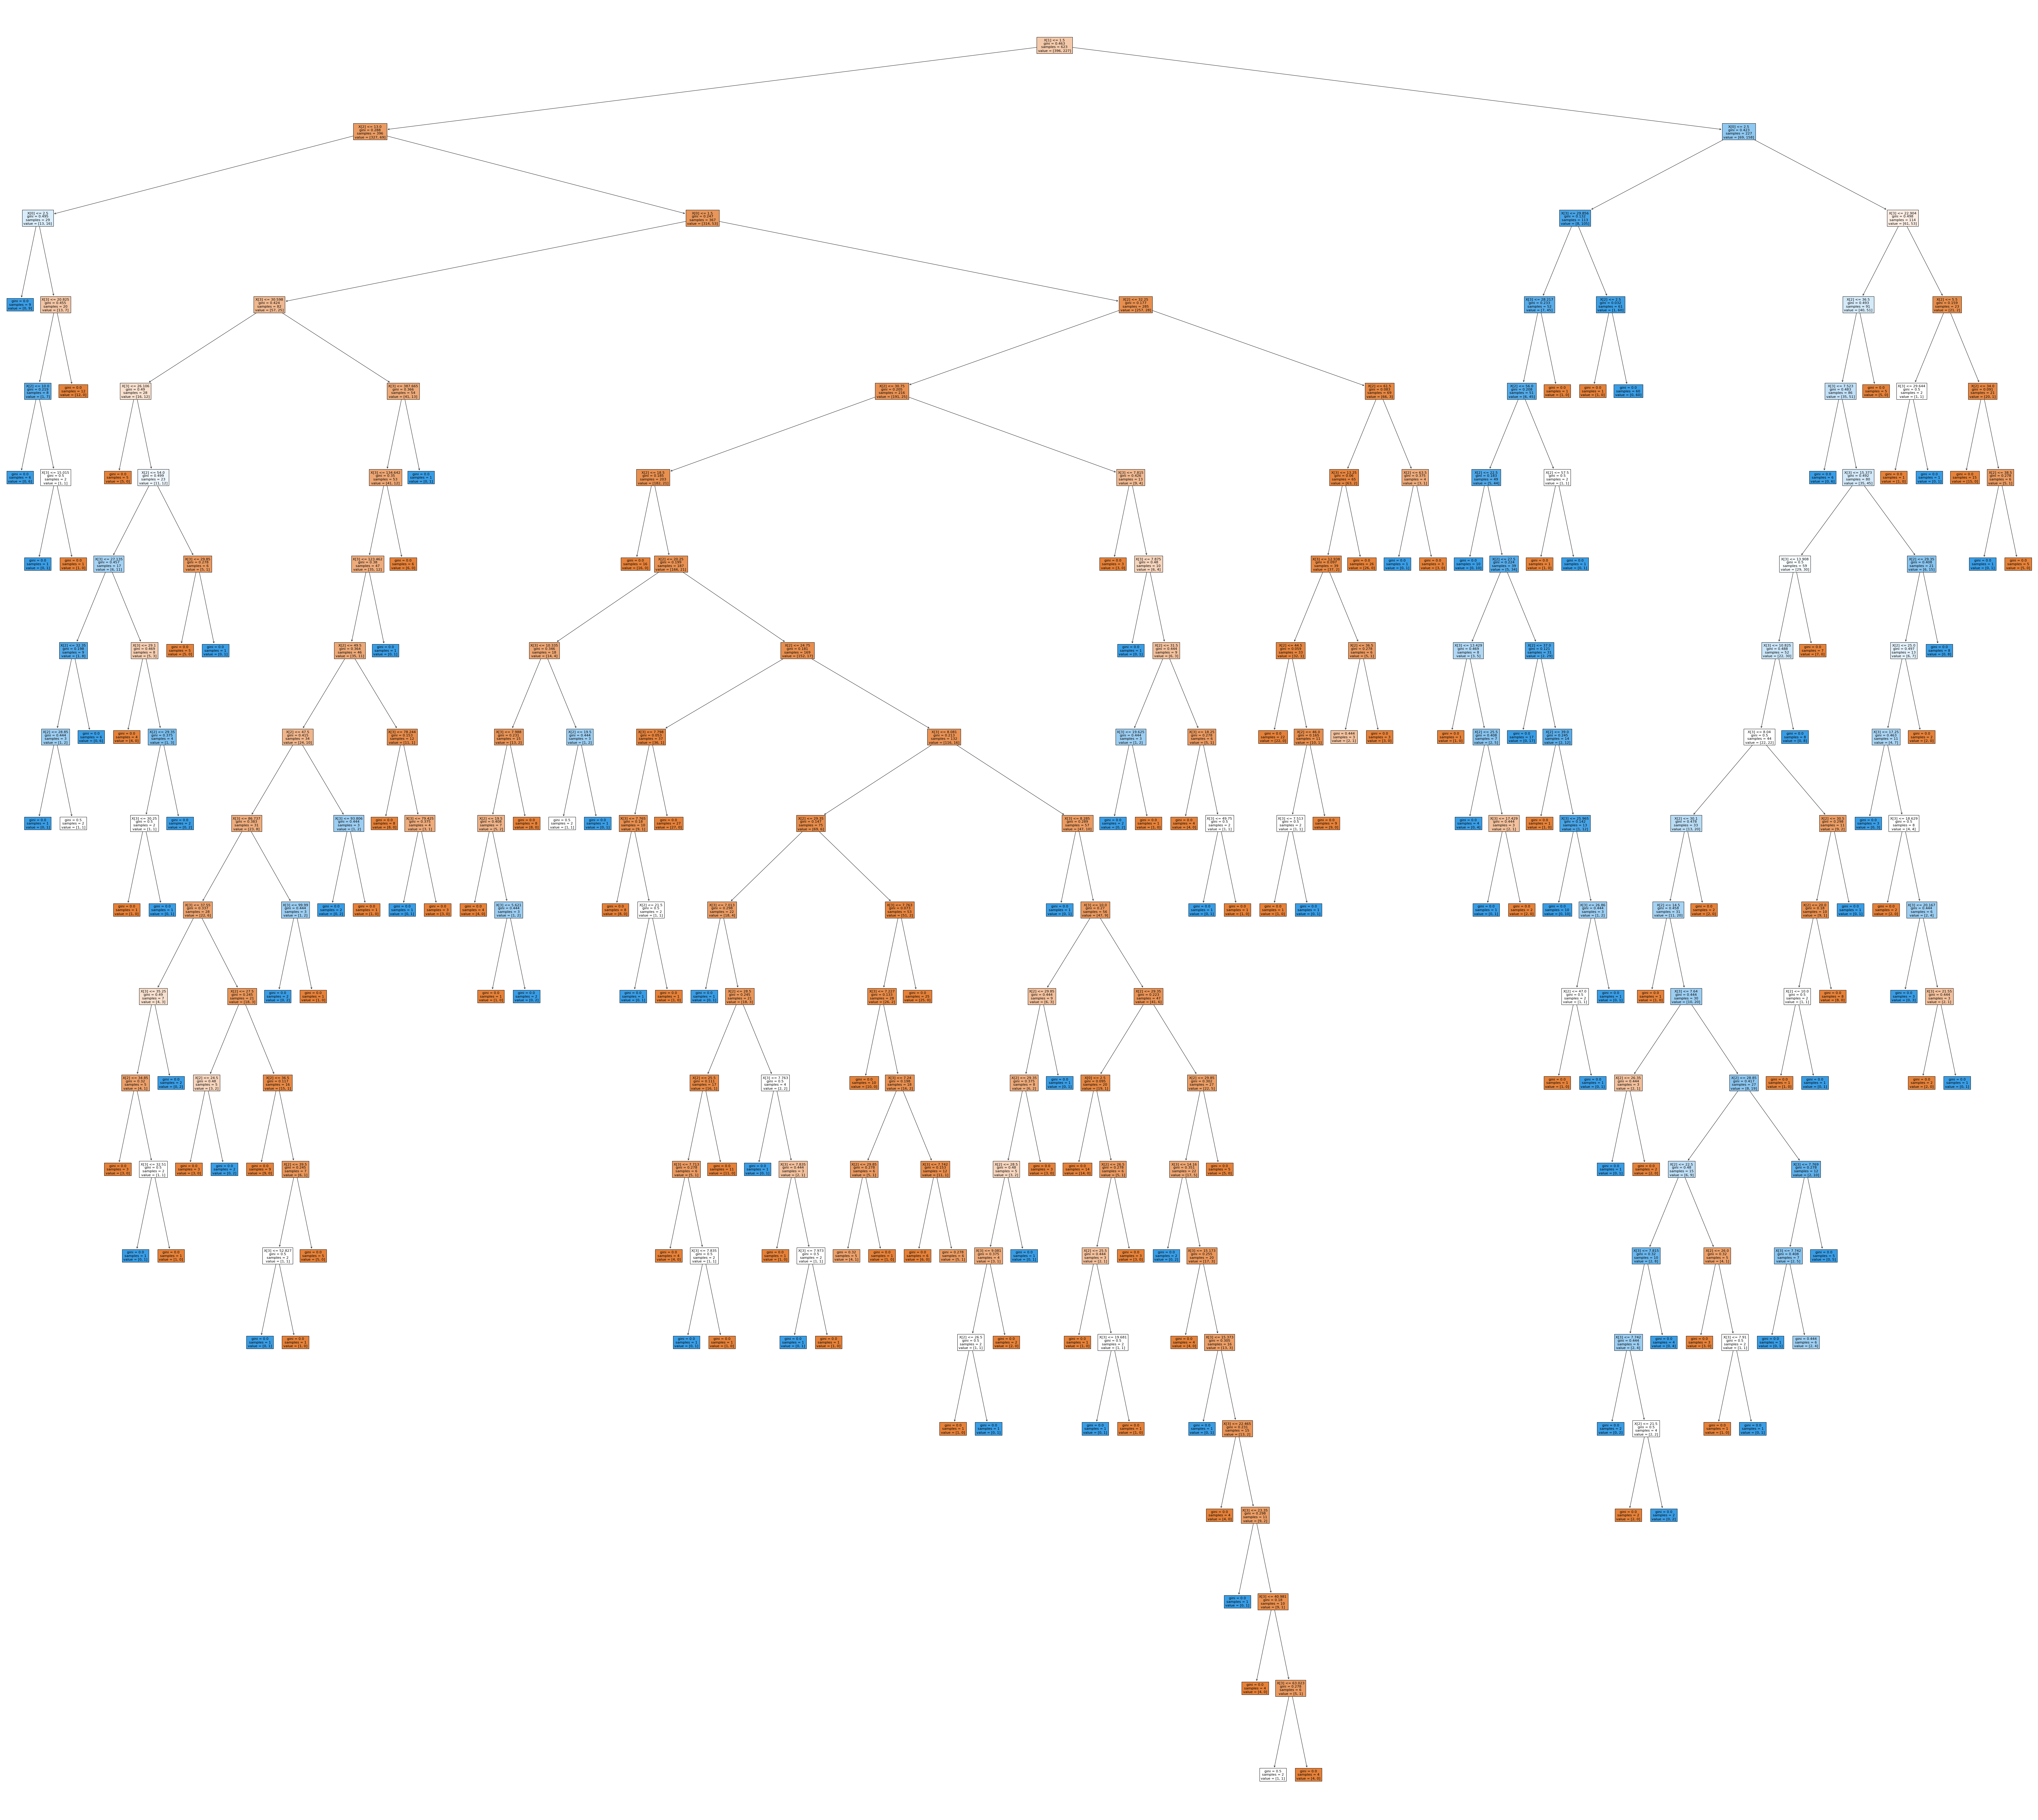

In [35]:
plt.figure(figsize=(120,110))
tree.plot_tree(model, filled=True)

In [36]:
print(tree.export_text(model))

|--- feature_1 <= 1.50
|   |--- feature_2 <= 13.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 20.83
|   |   |   |   |--- feature_2 <= 10.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  10.00
|   |   |   |   |   |--- feature_3 <= 15.01
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  15.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  20.83
|   |   |   |   |--- class: 0
|   |--- feature_2 >  13.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- feature_3 <= 30.60
|   |   |   |   |--- feature_3 <= 26.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  26.11
|   |   |   |   |   |--- feature_2 <= 54.00
|   |   |   |   |   |   |--- feature_3 <= 27.14
|   |   |   |   |   |   |   |--- feature_2 <= 32.35
|   |   |   |   |   |   |   |   |--- feature_2 <= 28.85
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   | 

In [38]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [39]:
ccp_alphas

array([0.00000000e+00, 1.07009096e-04, 1.78348493e-04, 2.35554613e-04,
       3.05740274e-04, 5.35045479e-04, 5.35045479e-04, 5.35045479e-04,
       6.42054575e-04, 7.09552620e-04, 7.13393972e-04, 7.62439807e-04,
       9.87776269e-04, 1.00714443e-03, 1.04116958e-03, 1.07009096e-03,
       1.07009096e-03, 1.20385233e-03, 1.20385233e-03, 1.20385233e-03,
       1.28410915e-03, 1.32423756e-03, 1.33761370e-03, 1.33761370e-03,
       1.37153176e-03, 1.40449438e-03, 1.43617471e-03, 1.44462279e-03,
       1.46555936e-03, 1.49454844e-03, 1.52149409e-03, 1.54105379e-03,
       1.54881586e-03, 1.56989218e-03, 1.73281774e-03, 1.93360690e-03,
       2.04290092e-03, 2.20004714e-03, 2.28947102e-03, 2.36392821e-03,
       2.51047732e-03, 2.67522739e-03, 2.90131564e-03, 3.23303768e-03,
       3.38666149e-03, 4.46545628e-03, 5.33473022e-03, 8.72833855e-03,
       1.01082083e-02, 1.32134181e-02, 1.43139964e-02, 3.92717633e-02,
       1.26116276e-01])

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12611627644704038


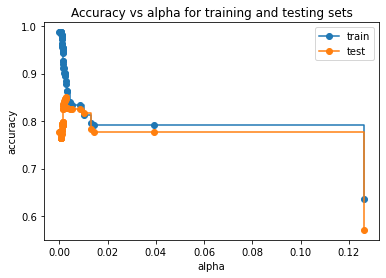

In [49]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [60]:
model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [61]:
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8470149253731343

[Text(441.75, 516.4200000000001, 'X[1] <= 1.5\ngini = 0.463\nsamples = 623\nvalue = [396, 227]'),
 Text(232.5, 462.06000000000006, 'X[2] <= 13.0\ngini = 0.288\nsamples = 396\nvalue = [327, 69]'),
 Text(93.0, 407.70000000000005, 'X[0] <= 2.5\ngini = 0.495\nsamples = 29\nvalue = [13, 16]'),
 Text(46.5, 353.34000000000003, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(139.5, 353.34000000000003, 'X[3] <= 20.825\ngini = 0.455\nsamples = 20\nvalue = [13, 7]'),
 Text(93.0, 298.98, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(186.0, 298.98, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(372.0, 407.70000000000005, 'X[0] <= 1.5\ngini = 0.247\nsamples = 367\nvalue = [314, 53]'),
 Text(325.5, 353.34000000000003, 'X[3] <= 30.598\ngini = 0.424\nsamples = 82\nvalue = [57, 25]'),
 Text(279.0, 298.98, 'X[3] <= 26.106\ngini = 0.49\nsamples = 28\nvalue = [16, 12]'),
 Text(232.5, 244.62, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(325.5, 244.62, 'X[2] <= 54.0\ngini = 0.499\nsamples =

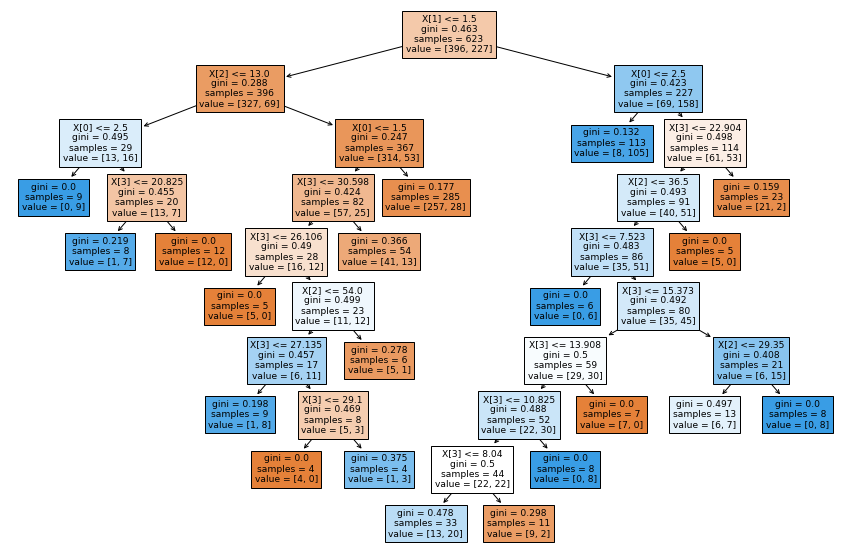

In [62]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)